# Red neuronal

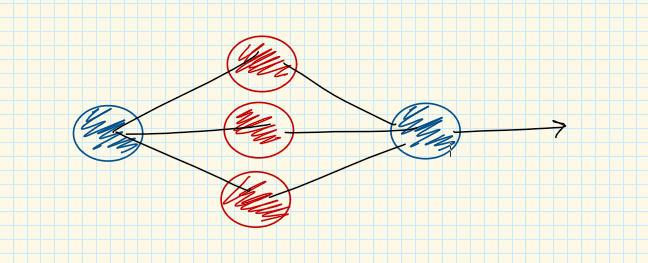

## Definimos las funciones que serán utilizadas por la red


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Vamos a modelar la función F(x)=-3x
def F(x):
    return -3*x

#primero la función de activación 
def relu(X):
    for i in range(0,len(X)):
        X[i]=max(0,X[i])
    return X

def drelu(X):
    for i in range(0,len(X)):
        if X[i]>=0: X[i]=1
        if X[i]<0: X[i]=0
    return X


## Generamos el conjunto de datos sintéticos que utilizaremos para entrenar

In [140]:
#Primero generamos nuestro conjunto de datos X y Y
X=np.random.rand(10,1)
Y=[]
for x in X:
    y=F(x)
    y=y+np.random.uniform(-0.1,0.1)
    Y.append(y)

## Ahora, dada la estructura de propuesta para la red, programammos el Forward Propagation

In [141]:
#necesitaremos z1,z2,a1,a2

def forward(X,W1,W2,b1,b2):
    z1=np.dot(W1,X)+b1
    a1=z1
    z2=np.dot(W2,a1)+b2
    a2=z2
    
    return(z1,a1,z2,a2)


## Utilizaremos la función de costo defnida por el error cuadrático medio:
$$C=\frac{1}{2n}\sum_{i=1}^{n}||a_2^i-y^i||^2$$
donde supone que tenemos $n$ datos para el entrenamiento, $a^i$ es la salida de nuestra red y $y^i$ es el valor que nosotros conocemos de antemano

In [162]:
#función de coste:
#iremos guardando los vaalores C=a_i-y_i en un arreglo para luego hacer la suma
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

## Backpropagation


In [173]:
#el back recibe z1,a1,z2,a2
#y va a regresar los respectivos gradientes de W y b

W1=np.random.rand(3,1)
W2=np.random.rand(1,3)
b1=np.random.rand(3)
b2=np.random.rand(1)

def back(X,Y,W1,W2,b1,b2):
    
    gw1=np.zeros(np.shape(W1))
    gw2=np.zeros(np.shape(W2))
    gb1=np.zeros(np.shape(b1))
    gb2=np.zeros(np.shape(b2))
    salidas=[]
    for i in range(len(X)):
        z1,a1,z2,a2=forward(X[i],W1,W2,b1,b2)
        #guardamos todas las salidas para calcular el error
        d2=a2-y[i]
        salidas.append(d2)
        d1=np.dot(np.transpose(W2),d2)
        gw1=gw1 + np.outer(d1, X[i])
        gw2=gw2 + np.outer(d2, a1)
        gb1=gb1 + d1
        gb2=gb2 + d2
        
        
    return np.array(gw1),np.array(gw2),np.array(gb1),np.array(gb2),np.array(salidas)


In [174]:
back(X,Y,W1,W2,b1,b2)

(array([[ 9.05828824],
        [10.24532564],
        [ 0.83398066]]),
 array([[36.65618082, 17.69480508, 17.49904022]]),
 array([17.55790869, 19.85877325,  1.61652577]),
 array([27.27922867]),
 array([[-3.32380516],
        [-0.96382437],
        [-1.63052456],
        [-3.08319367],
        [-2.67179741],
        [-2.12994884],
        [-3.29882451],
        [-4.04704964],
        [-2.36470786],
        [-3.76555264]]))

## Aprendizaje 
Ahora implementaremos la red usando todas las partes que hemos definido 

In [179]:
#definimos la red

def red(X,Y,epocas,eta):
    #los parámetros inician de forma aleatoria
    W1=np.random.rand(3,1)
    W2=np.random.rand(1,3)
    b1=np.random.rand(3)
    b2=np.random.rand(1)
    
    #Ahora iniciamos el proceso por las épocas que queremos
    for i in range(epocas):
        #ahora calculamos los gradientes con el BP
        gw1,gw2,gb1,gb2,salidas=back(X,Y,W1,W2,b1,b2)
        print('El error es ',error(salidas))
        
        #actualizamos los respectivos valores
        W1=W1-eta/(2*len(x))*gw1
        W2=W2-eta/(2*len(x))*gw2
        b1=b1-eta/(2*len(x))*gb1
        b2=b2-eta/(2*len(x))*gb2
        
    #print('W1=',W1)
    #print('W2=',W2)
    #print('b1=',b1)
    #print('b2=',b2)
    
    
    

In [194]:
#probamos
X=np.random.rand(10,1)
Y=[]
for x in X:
    y=F(x)
    y=y+np.random.uniform(-0.1,0.1)
    Y.append(y)
    
red(X,Y,10,0.5)


El error es  4.252637077585069
El error es  228.1004653326262
El error es  2954087990.359231
El error es  5.194623144106216e+30
El error es  2.820443656638129e+94
El error es  4.5144783544218737e+285
El error es  nan
El error es  nan
El error es  nan
El error es  nan


In [2]:
x=np.array([[1],[2],[3]])
x

NameError: name 'np' is not defined

In [1]:
X

NameError: name 'X' is not defined